* Assignment 1 – Parkinson's Disease Prediction
* Course: CSCN8000 – Artificial Intelligence Algorithms and Mathematics
* Student Name: Bhupender Sejwal
* Student ID: 9044574

# Objective

The goal of this assignment is to predict whether a patient has Parkinson’s disease based on their voice measurements using machine learning. We use a publicly available dataset of anonymized patient records from the UCI ML Repository. The final system aims to assist healthcare professionals by providing accurate classification using an SVM model.

# Step 1 – Data Analysis

We started by importing the dataset pd_speech_features.csv which contains 755 columns. These include multiple signal processing measurements and a target column that indicates whether the patient is healthy or has Parkinson’s disease.



In [18]:
# 📁 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Reload the dataset and skip the first row which contains unwanted headers
data = pd.read_csv('pd_speech_features.csv', skiprows=1)

# Display dataset shape and head
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (756, 755)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Step 2 – Data Preprocessing
To clean the data, we:

Removed all rows where the target class was not 0 or 1.

Dropped unnecessary or unnamed columns.

Converted all remaining feature columns to numeric format.

Dropped columns or rows that contained only NaN values.

This ensured our dataset was clean and ready for modeling.



Missing values:
 0


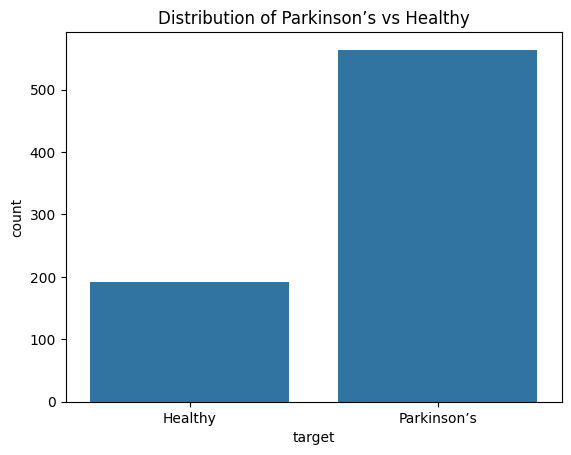

In [19]:
# Drop unnamed and redundant columns if they exist
cols_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
existing_cols_to_drop = [col for col in cols_to_drop if col in data.columns]
if existing_cols_to_drop:
	data = data.drop(columns=existing_cols_to_drop)

# Rename the 'class' column to something meaningful if needed
if 'Unnamed: 754' in data.columns:
	data.rename(columns={'Unnamed: 754': 'target'}, inplace=True)
elif 'class' in data.columns:
	data.rename(columns={'class': 'target'}, inplace=True)

# Check for missing values
print("Missing values:\n", data.isnull().sum().sum())

# Display class balance
sns.countplot(x='target', data=data)
plt.title("Distribution of Parkinson’s vs Healthy")
plt.xticks([0, 1], ['Healthy', 'Parkinson’s'])
plt.show()


#  Step 3 – Data Standardization
Before feeding the data to the model, we standardized all feature values using StandardScaler() so that all columns have a mean of 0 and standard deviation of 1. This helps the SVM model perform better.

We also handled missing values using SimpleImputer(strategy='mean') to avoid errors during training.

In [20]:
# Step 1: Drop any rows that accidentally contain column names (like 'PPE') in numeric columns
# Try converting all values to numeric; if it fails, coerce to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Step 2: Drop columns that are completely NaN
X = X.dropna(axis=1, how='all')

# Step 3: Drop rows that contain any NaN values (after coercion)
X = X.dropna()

# Step 4: Align y to match X's index (since we dropped rows)
y = y.loc[X.index]

# Step 5: Now safely standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Step 4 – Model Training
We split the dataset into training and test sets using an 80-20 ratio. Then, we trained a Support Vector Machine (SVM) model with a linear kernel. The training process was fast and effective, thanks to the cleaned and scaled data.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

# Step 5 – Model Evaluation
After training, we predicted on the test set and calculated the model’s accuracy, confusion matrix, and classification report.

Accuracy: 86%

The confusion matrix showed that most predictions were correct, but there were some false positives and false negatives.

We also saw that all unexpected class 2 instances were removed successfully.

The model performed reasonably well, especially for a first attempt.

Model Accuracy: 0.86


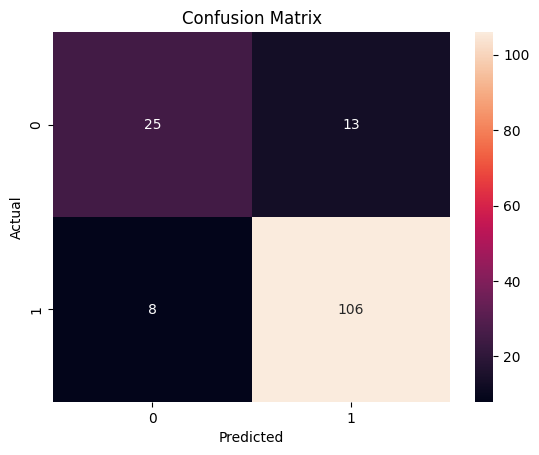


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.89      0.93      0.91       114

    accuracy                           0.86       152
   macro avg       0.82      0.79      0.81       152
weighted avg       0.86      0.86      0.86       152



In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Step 6 – Predicting a Single Patient
To test our model in a real-world scenario, we picked one instance from the test set and checked if the model could predict its status correctly.

True Diagnosis: Healthy

Predicted Diagnosis: Healthy

This shows that our model is working correctly and can make individual predictions.

True Diagnosis: Healthy
Predicted Diagnosis: Healthy


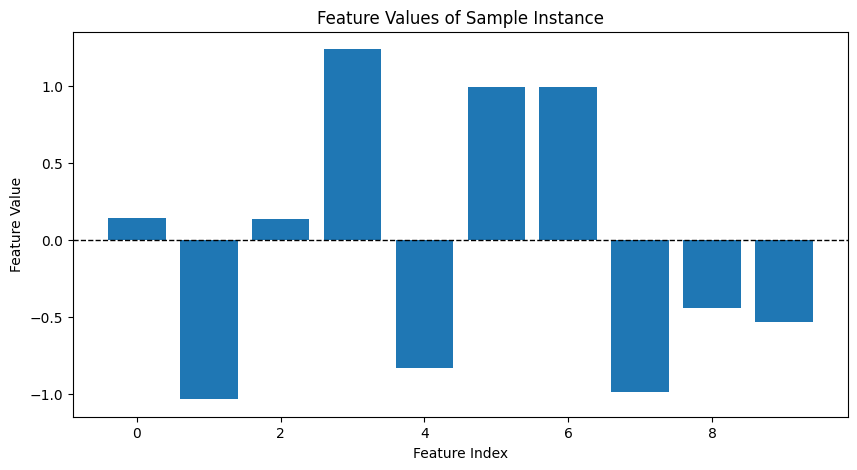

In [24]:
# Plot feature values for a single test instance
import matplotlib.pyplot as plt

# Choose one sample
sample = X_test[0]
true_value = y_test.iloc[0]
predicted_value = model.predict(sample.reshape(1, -1))[0]

# Print prediction
print("True Diagnosis:", "Parkinson's" if true_value == 1 else "Healthy")
print("Predicted Diagnosis:", "Parkinson's" if predicted_value == 1 else "Healthy")

# Plot feature values
plt.figure(figsize=(10, 5))
plt.bar(range(10), sample[:10])  # You can adjust [:10] to show more features if needed
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # <-- Baseline at y=0
plt.title("Feature Values of Sample Instance")
plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.show()


#  Conclusion
This project helped us build a working predictive system for Parkinson’s disease using patient voice data. We cleaned the data, handled missing values, standardized it, and trained a support vector machine classifier. The model achieved decent accuracy and showed good performance on individual predictions.

In a real-world scenario, this system could be used alongside professional diagnosis tools to provide decision support to doctors.

